# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random
from collections import deque
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
check_GPU = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
check_GPU
torch.cuda.get_device_name(0)

'GeForce GTX 1060'

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
agent = Agent(state_size, action_size, num_agents=num_agents, random_seed=0)


def ddpg(n_episodes=10000, max_t=1000, print_every=100, train=True):
    scores_window = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]   
        num_agents = len(env_info.agents)
        states = env_info.vector_observations
        scores_t = np.zeros(num_agents)
        agent.reset()
        
        for t in range(max_t):            
            #actions = agent.act(states if train else np.zeros(states.size()))
            actions = agent.act(states, i_episode)
            env_info = env.step(actions)[brain_name]            
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            if train:
                agent.step(states, actions, rewards, next_states, dones, t)
                states = next_states
                scores_t += np.array(rewards)
            if np.any(dones):
                break
        
        score = np.mean(scores_t)   
        scores_window.append(score)
        avg_score = np.mean(scores_window)
        scores.append(score)
     

        print('\rEpisode {}\tAverage Score: {:.2f}\tMean current: {:.2f}'.format(i_episode, avg_score, score), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % 5 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))
        if avg_score >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avg_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores

In [9]:
scores = ddpg()

Episode 5	Average Score: -0.00	Mean current: -0.00
Episode 10	Average Score: -0.00	Mean current: -0.00
Episode 15	Average Score: -0.00	Mean current: -0.00
Episode 20	Average Score: -0.00	Mean current: -0.00
Episode 25	Average Score: -0.00	Mean current: -0.00
Episode 30	Average Score: -0.00	Mean current: -0.00
Episode 35	Average Score: -0.00	Mean current: -0.00
Episode 40	Average Score: 0.00	Mean current: 0.0550
Episode 45	Average Score: -0.00	Mean current: -0.00
Episode 50	Average Score: -0.00	Mean current: -0.00
Episode 55	Average Score: -0.00	Mean current: -0.00
Episode 60	Average Score: -0.00	Mean current: -0.00
Episode 65	Average Score: -0.00	Mean current: -0.00
Episode 70	Average Score: 0.00	Mean current: -0.000
Episode 75	Average Score: 0.00	Mean current: -0.00
Episode 80	Average Score: 0.00	Mean current: -0.00
Episode 85	Average Score: 0.00	Mean current: -0.00
Episode 90	Average Score: 0.00	Mean current: -0.00
Episode 95	Average Score: 0.00	Mean current: 0.050
Episode 100	Averag

Episode 785	Average Score: 0.17	Mean current: 0.10
Episode 790	Average Score: 0.18	Mean current: 0.30
Episode 795	Average Score: 0.18	Mean current: 0.05
Episode 800	Average Score: 0.15	Mean current: 0.25
Episode 805	Average Score: 0.10	Mean current: 0.05
Episode 810	Average Score: 0.11	Mean current: 0.15
Episode 815	Average Score: 0.17	Mean current: 1.95
Episode 820	Average Score: 0.20	Mean current: 0.05
Episode 825	Average Score: 0.20	Mean current: 0.05
Episode 830	Average Score: 0.23	Mean current: 0.05
Episode 835	Average Score: 0.26	Mean current: 0.60
Episode 840	Average Score: 0.28	Mean current: 1.10
Episode 845	Average Score: 0.30	Mean current: 0.35
Episode 850	Average Score: 0.31	Mean current: 0.15
Episode 855	Average Score: 0.35	Mean current: 0.15
Episode 860	Average Score: 0.36	Mean current: 0.05
Episode 865	Average Score: 0.38	Mean current: 0.85
Episode 870	Average Score: 0.45	Mean current: 2.60
Episode 875	Average Score: 0.47	Mean current: 0.05
Episode 878	Average Score: 0.50

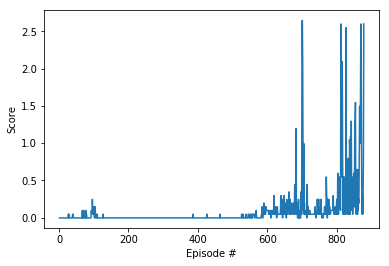

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
def run_trained_agent():
    n_episodes = 1000
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]   
        num_agents = len(env_info.agents)
        states = env_info.vector_observations
        scores_t = np.zeros(num_agents)
        agent.reset()
    
    for t in range(1000):            
        #actions = agent.act(states if train else np.zeros(states.size()))
        actions = agent.act(states, i_episode)
        env_info = env.step(actions)[brain_name]            
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        if any(dones):
            break 
            
run_trained_agent()

env.close()

